In [38]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [39]:
df= pd.read_csv('Salary_Data.csv')

In [40]:
df

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [83]:
# Separate the input and output variable
x=df[['YearsExperience']] # input data should be two diamension
y=df['Salary']

In [84]:
x.shape

(30, 1)

In [85]:
y.shape

(30,)

In [44]:
# corelation factor shows hihly related to each other.
df.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


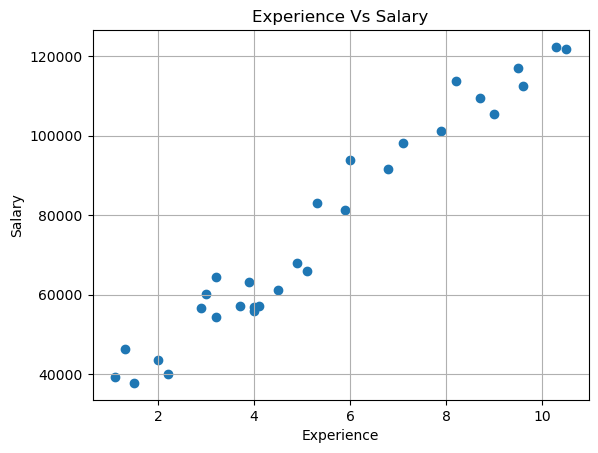

In [45]:
plt.grid()
plt.title('Experience Vs Salary')
plt.xlabel('Experience')
plt.ylabel('Salary')
plt.scatter(x,y)

In [46]:
# import the function
from sklearn.model_selection import train_test_split

In [47]:
# split the data in training (75%) and testing (25%)
x_train,x_text,y_train,y_test=train_test_split(x,y,random_state=0) # interchage the value of x and y

In [48]:
x_train.size

22

In [49]:
x_text.size

8

In [50]:
from sklearn.linear_model import LinearRegression

In [51]:
regressor=LinearRegression()

In [52]:
regressor.fit(x_train,y_train)

LinearRegression()

In [53]:
m=regressor.coef_

In [54]:
c=regressor.intercept_

In [55]:
m

array([9379.71049195])

In [56]:
c

26986.691316737248

In [57]:
y=m*12+c

In [58]:
y

array([139543.21722009])

In [59]:
regressor.predict([[12]])

C:\Users\rajesh\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([139543.21722009])

In [60]:
# Validation or Check acquirecy
# predic on data set

In [61]:
y_pred=regressor.predict(x_text)

In [62]:
y_pred

array([ 41056.25705466, 123597.70938378,  65443.50433372,  63567.56223533,
       116093.94099022, 108590.17259667, 117031.91203942,  64505.53328452])

In [63]:
y_test

2      37731.0
28    122391.0
13     57081.0
10     63218.0
26    116969.0
24    109431.0
27    112635.0
11     55794.0
Name: Salary, dtype: float64

In [64]:
y_pred-y_test

2     3325.257055
28    1206.709384
13    8362.504334
10     349.562235
26    -875.059010
24    -840.827403
27    4396.912039
11    8711.533285
Name: Salary, dtype: float64

In [65]:
result=pd.DataFrame({
    'actual':y_test,
    'Prediction':y_pred
})

In [66]:
type(y_pred)

numpy.ndarray

In [67]:
result=pd.DataFrame({
    'x':x_text['YearsExperience'],
    'y':y_test,
    'y^':y_pred,
    'Error':y_pred - y_test,
    'abs(error)':abs(y_pred-y_test)
})

In [68]:
result

,x,y,y^,Error,abs(error)
2,1.5,37731.0,41056.257055,3325.257055,3325.257055
28,10.3,122391.0,123597.709384,1206.709384,1206.709384
13,4.1,57081.0,65443.504334,8362.504334,8362.504334
10,3.9,63218.0,63567.562235,349.562235,349.562235
26,9.5,116969.0,116093.940990,-875.059010,875.059010
24,8.7,109431.0,108590.172597,-840.827403,840.827403
27,9.6,112635.0,117031.912039,4396.912039,4396.912039
11,4.0,55794.0,64505.533285,8711.533285,8711.533285


In [69]:
np.mean(abs(y_pred-y_test))

3508.5455930660555

In [70]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test,y_pred)

3508.5455930660555

In [71]:
result=pd.DataFrame({
    'x':x_text['YearsExperience'],
    'y':y_test,
    'y^':y_pred,
    'Error':y_pred - y_test,
    'Error^^2':(y_pred-y_test)**2
})

In [72]:
result

,x,y,y^,Error,Error^^2
2,1.5,37731.0,41056.257055,3325.257055,1.105733e+07
28,10.3,122391.0,123597.709384,1206.709384,1.456148e+06
13,4.1,57081.0,65443.504334,8362.504334,6.993148e+07
10,3.9,63218.0,63567.562235,349.562235,1.221938e+05
26,9.5,116969.0,116093.940990,-875.059010,7.657283e+05
24,8.7,109431.0,108590.172597,-840.827403,7.069907e+05
27,9.6,112635.0,117031.912039,4396.912039,1.933284e+07
11,4.0,55794.0,64505.533285,8711.533285,7.589081e+07


In [73]:
np.sqrt(np.mean((y_pred-y_test)**2))

4733.70258289858

In [74]:
from sklearn.metrics import mean_absolute_error
np.sqrt(mean_absolute_error(y_test,y_pred))

59.232977242968765

In [75]:
mean_val=np.mean(y_test)
mean_val

84406.25

In [76]:
num=np.sum((y_test-mean_val)**2)-np.sum((y_test-y_pred)**2)
r2=num/np.sum((y_test-mean_val)**2)
r2

0.9779208335417601

In [77]:
# another method for testing of modal prediction in pertage Method 1

In [78]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.9779208335417602

In [ ]:
# another method for testing of modal prediction in pertage Method 2

In [79]:
regressor.score(x_text,y_test)

0.9779208335417602

In [86]:
regressor.score(x,y)

0.955975487542377

In [81]:
regressor.score(x_train,y_trainb)

0.9395413526983522

In [94]:
y_pred=regressor.predict(x)

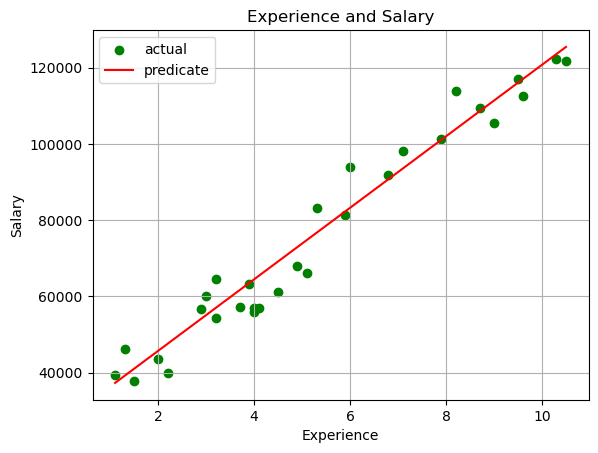

In [95]:
plt.grid()
plt.title('Experience and Salary')
plt.xlabel('Experience')
plt.ylabel('Salary')
plt.scatter(x,y,color='green',label='actual')
plt.plot(x,y_pred,color='red',label='predicate')
plt.legend()

In [96]:
y_pred= regressor.predict(x_text)
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(y_test,y_pred)

0.05754512646779697

In [105]:
exp=float(input('Enter the experience'))
exp= pd.DataFrame({'YearsExperience':[exp]})
sal=regressor.predict(exp)
print('Your expected salary can be:',sal[0])

Enter the experience 12


Your expected salary can be: 139543.21722008943


In [106]:
exp

,YearsExperience
0,12.0


In [107]:
df.columns

Index(['YearsExperience', 'Salary'], dtype='object')

In [108]:
df.shape


(30, 2)

In [109]:
df1=df['Salary']==3000

In [110]:
df1.shape

(30,)

In [111]:
df[df1]

,YearsExperience,Salary


In [112]:
df1

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
Name: Salary, dtype: bool